In [1]:
import torch
import torch.nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
### building a model data

weight = 0.10
bias = 0.3

hello = torch.arange(start=1, end = 10 , step = 0.001).unsqueeze(dim=1)
bro = torch.arange(start = 1, end = 10, step = 0.001).unsqueeze(dim=1)

hello[:10],bro[:10]

(tensor([[1.0000],
         [1.0010],
         [1.0020],
         [1.0030],
         [1.0040],
         [1.0050],
         [1.0060],
         [1.0070],
         [1.0080],
         [1.0090]]),
 tensor([[1.0000],
         [1.0010],
         [1.0020],
         [1.0030],
         [1.0040],
         [1.0050],
         [1.0060],
         [1.0070],
         [1.0080],
         [1.0090]]))

In [6]:
len (hello), len (bro)

(9000, 9000)

### here i would be focusing on splitting the data into train and test sets mate

In [7]:
 ## there are three types of sets
 ## 1. training set - 60 - 80%
 ## 2. validation set - not all models have it but mostly 10 %
 ## 3. test set - 10 - 30%

In [9]:
train_split = int(0.8*len(hello))
hello_train, bro_train = hello[:train_split],bro[:train_split]
hello_test, bro_test = hello[train_split:],bro[train_split:]

len(hello_test),len(hello_train),len(bro_test),len(bro_train)

(1800, 7200, 1800, 7200)

alright lets use matplotlib to make it more amusing as a firework less goo

In [11]:
def graphy(train_data = hello_train,
           train_label= bro_train,
           test_data = hello_test,
           test_label= bro_test,
           predictions = None):

    plt.figure(figsize=(6,9))

    plt.scatter(train_data,train_label,c="r",s=4,label = "training data")
    plt.scatter(test_data,test_label,c="g",s=4,label="testing data")

    if predictions is not None:
      plt.scatter(test_data,predictions,c="b",s=4,label="predictions")


    plt.legend(prop={"size":14})





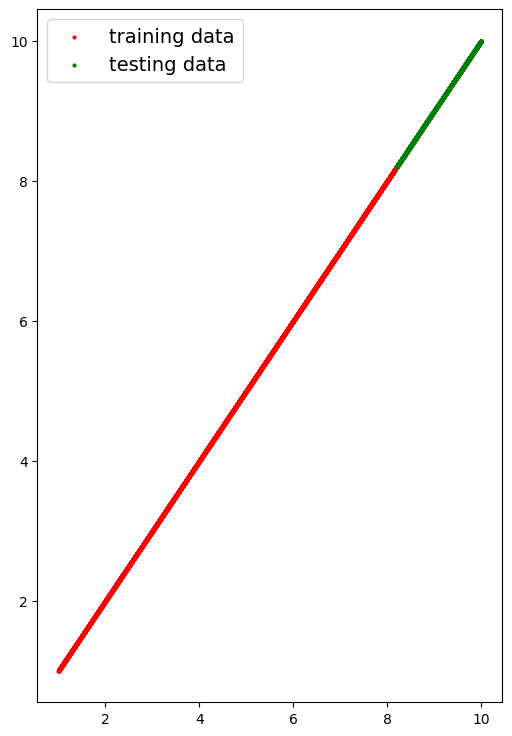

In [12]:
graphy()